# Linear Model for Classification

In regression, we saw that the target to be predicted was a continuous variable. In classification, it is discrete.

We will go back to our penguin dataset. However, this time we will try to predict the penguin species using the culmen information. We will consider only 2 penguin species to solve a binary classification problem.

In [35]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [36]:
penguins = pd.read_csv('data/penguins_classification.csv')

# We only keep the Adelie and Chinstrap classes
penguins = penguins.set_index("Species").loc[
    ['Adelie', 'Chinstrap']].reset_index()
culmen_columns = ['Culmen Length (mm)', 'Culmen Depth (mm)']
target_column = "Species"

In [37]:
penguins.sample(5)

,Species,Culmen Length (mm),Culmen Depth (mm)
170,Chinstrap,49.2,18.2
139,Adelie,40.2,17.1
160,Chinstrap,51.3,19.9
36,Adelie,42.2,18.5
127,Adelie,39.0,17.1


We can quickly start by visualizing the feature distribution by class:

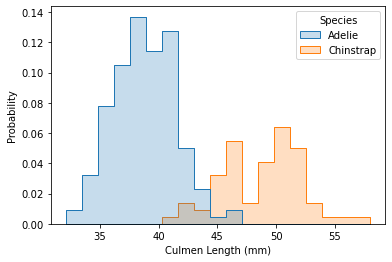

In [38]:
sns.histplot(data=penguins, x='Culmen Length (mm)', bins=19,
             element='step', hue='Species', stat='probability');

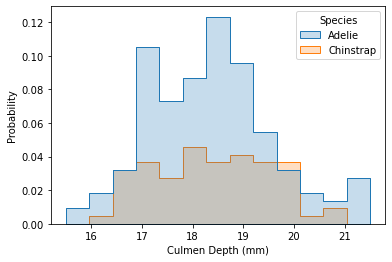

In [39]:
sns.histplot(data=penguins, x='Culmen Depth (mm)', bins=13,
         element='step', hue='Species', stat='probability');

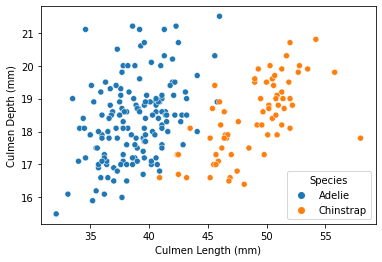

In [54]:
sns.scatterplot(data=penguins, x='Culmen Length (mm)',
             y='Culmen Depth (mm)', hue='Species');

For model fitting, we will separate the target from the data and we will create a training and a testing test:

In [40]:
penguins_train, penguins_test = train_test_split(penguins, random_state=0)

data_train = penguins_train[culmen_columns]
data_test = penguins_test[culmen_columns]

target_train = penguins_train[target_column]
target_test = penguins_test[target_column]

In [41]:
range_features = {
    feature_name: (penguins[feature_name].min() - 1,
                   penguins[feature_name].max() + 1)
    for feature_name in culmen_columns
}

To visualize the separation by the classifier, we define the following helper function:

In [43]:
def plot_decision_function(fitted_classifier, range_features, ax=None):
    """Plot the boundary of the decision function of a classifier."""
    from sklearn.preprocessing import LabelEncoder

    feature_names = list(range_features.keys())
    # create a grid to evaluate all possible samples
    plot_step = 0.02
    xx, yy = np.meshgrid(
        np.arange(*range_features[feature_names[0]], plot_step),
        np.arange(*range_features[feature_names[1]], plot_step),
    )

    # compute the associated prediction
    Z = fitted_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = LabelEncoder().fit_transform(Z)
    Z = Z.reshape(xx.shape)

    # make the plot of the boundary and the data samples
    if ax is None:
        _, ax = plt.subplots()
    ax.contourf(xx, yy, Z, alpha=0.4, cmap="RdBu_r")

    return ax

The linear regression that we previously saw will predict a continuous output. When the target is a binary outcome, one can use the logistic function to model the probability. this model is known as logistic regression.  

Scikit-learn provides the class `LogisticRgression` which implements this algorithm.

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
logistic_regression = make_pipeline(StandardScaler(), 
                                   LogisticRegression(penalty='none'))
logistic_regression.fit(data_train, target_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(penalty='none'))])

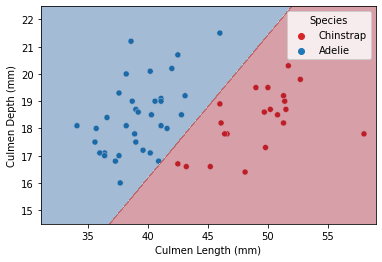

In [48]:
ax = sns.scatterplot(
    data=penguins_test, x=culmen_columns[0], y=culmen_columns[1],
    hue=target_column, palette=["tab:red", "tab:blue"])
plot_decision_function(logistic_regression, range_features, ax=ax);

We see that our decision function is represented by a line separating the 2 classes. We should also note that we did not impose any regularization by setting the parameter `penalty` to `none`.

Since the line is oblique, it means that we used a combination of both features:

In [51]:
coefs = logistic_regression[-1].coef_[0]
weights = pd.Series(coefs, index=culmen_columns)

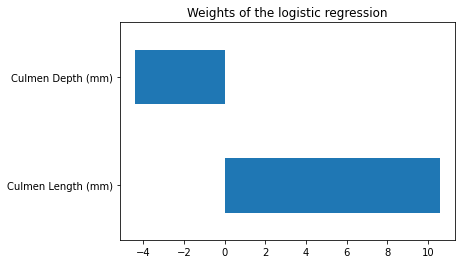

In [52]:
weights.plot.barh()
plt.title("Weights of the logistic regression");

Indeed, both coefficients are being used.